In [127]:
election <- read.csv("../Data/election_result_ansi.csv", fileEncoding = 'euc-kr')

head(election)

X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359


# 광역시별 투표율을 3D Pie chart로 표현하기

In [128]:
# 1) 광역시도별 pop의 합계를 구하기 

elec_sum <- aggregate(pop ~ 광역시도, election, sum) #파이차트를 이 상태로 그리면 정렬 안된 상태.
head(elec_sum)

광역시도,pop
강원도,955885
경기도,7916009
경상남도,2135055
경상북도,1711627
광주광역시,957321
대구광역시,1581347


In [129]:
# 2) 합계의 순서 정렬 (doBy)
library(doBy)

In [130]:
# 광역시별 합계를 내림차순으로 정렬하기 
elec_sum_order <- orderBy(~ -pop, elec_sum)
head(elec_sum_order)

,광역시도,pop
2,경기도,7916009
9,서울특별시,6590646
8,부산광역시,2261633
3,경상남도,2135055
12,인천광역시,1820091
4,경상북도,1711627


In [131]:
# 3D pie chart
library(plotrix)

In [132]:
# Ratio 구하기 (소수점 둘째자리)
e_ratio <- round(elec_sum_order$pop / sum(elec_sum_order$pop) *100,2)

In [133]:
# label 만들기 
label <- paste(elec_sum_order$광역시도, "\n", e_ratio, "%")

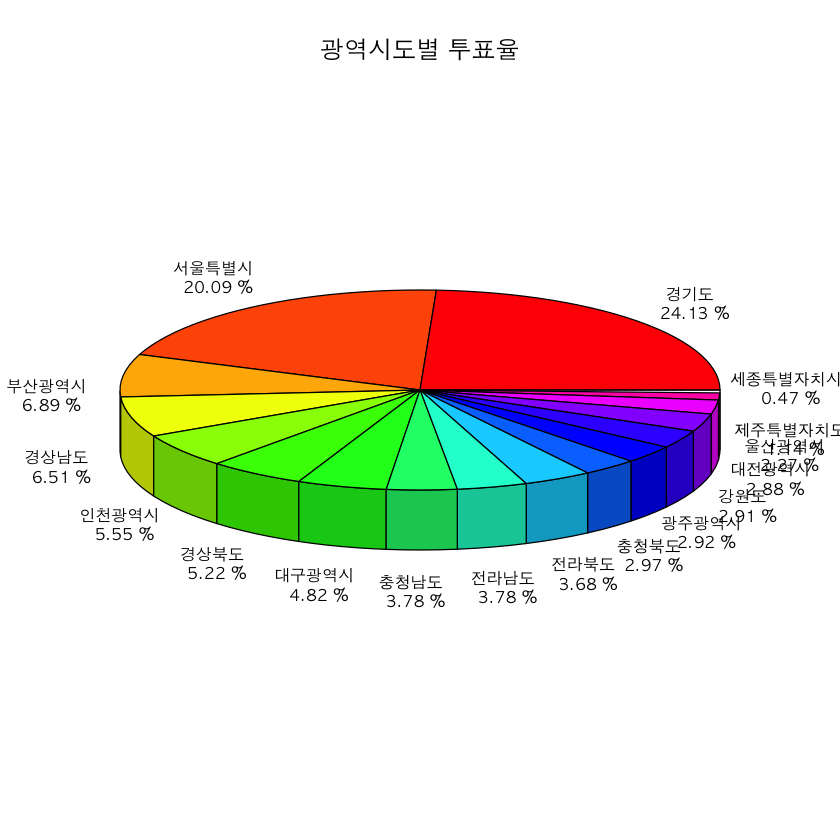

In [134]:
options(warn = -1)
par(family = "AppleGothic")

pie3D(elec_sum_order$pop,
     labels = label,
     main = "광역시도별 투표율",
     labelcex = 0.8 #label의 글씨 줄이기
     ) 

In [135]:
head(election)

X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359


In [136]:
# moon 후보의 광역시도별 득표율 
# 3%미만은 안보겠다(조건 ifelse)

elec_moon_sum <- aggregate(moon ~ 광역시도, election, sum)
head(elec_moon_sum)
elec_moon_sum_order <- orderBy(~ -moon, elec_moon_sum)
head(elec_moon_sum_order)

광역시도,moon
강원도,324768
경기도,3319812
경상남도,779731
경상북도,369726
광주광역시,583847
대구광역시,342620


,광역시도,moon
2,경기도,3319812
9,서울특별시,2781345
8,부산광역시,872127
3,경상남도,779731
14,전라북도,778747
12,인천광역시,747090


In [137]:
e_m_ratio <- round(elec_moon_sum_order$moon / sum(elec_moon_sum_order$moon) *100,1) #소수점 첫째 자리만

In [138]:
#e_m_ratio -> ifelse 구문 사용 (3보다 클 때, 비율과 % 사용, 아무것도 안사용), 문자 합칠 때 paste() 사용

m_label <- paste(elec_moon_sum_order$광역시도, "\n", ifelse(e_m_ratio >= 3 , 
                                                        paste(e_m_ratio, "%"), " " ))
m_label

[1] "경기도 \n 24.7 %"     "서울특별시 \n 20.7 %" "부산광역시 \n 6.5 %" 
 [4] "경상남도 \n 5.8 %"    "전라북도 \n 5.8 %"    "인천광역시 \n 5.6 %" 
 [7] "전라남도 \n 5.5 %"    "광주광역시 \n 4.3 %"  "충청남도 \n 3.6 %"   
[10] "대전광역시 \n 3 %"    "충청북도 \n  "        "경상북도 \n  "       
[13] "대구광역시 \n  "      "강원도 \n  "          "울산광역시 \n  "     
[16] "제주특별자치도 \n  "  "세종특별자치시 \n  "

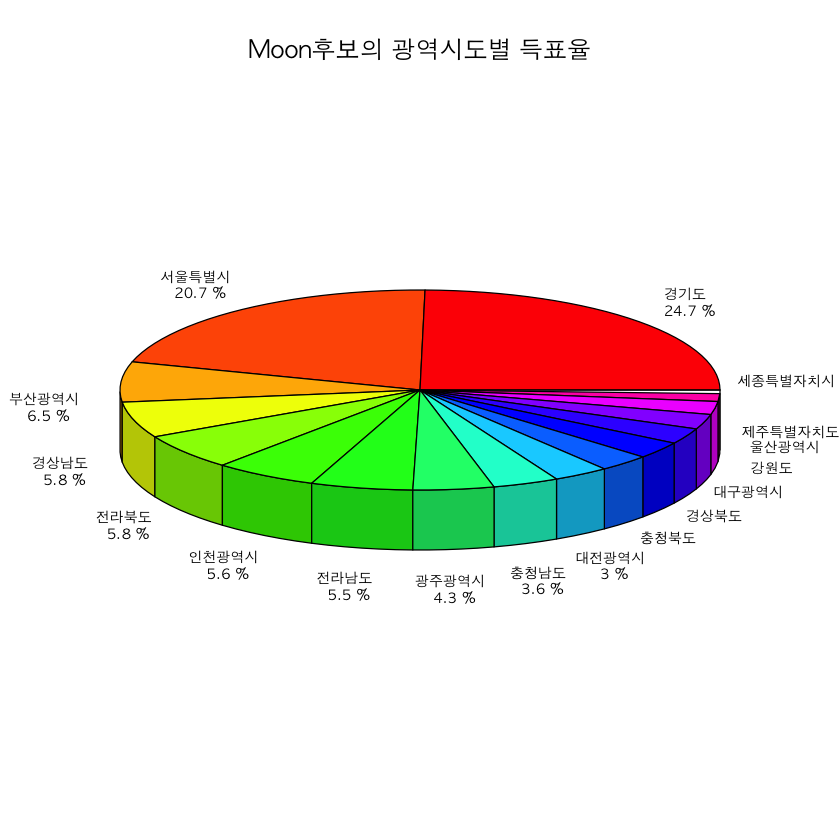

In [139]:
par(family = "AppleGothic")

pie3D(elec_moon_sum_order$moon,
     labels = m_label,
     main = "Moon후보의 광역시도별 득표율",
     labelcex = 0.7
     ) 

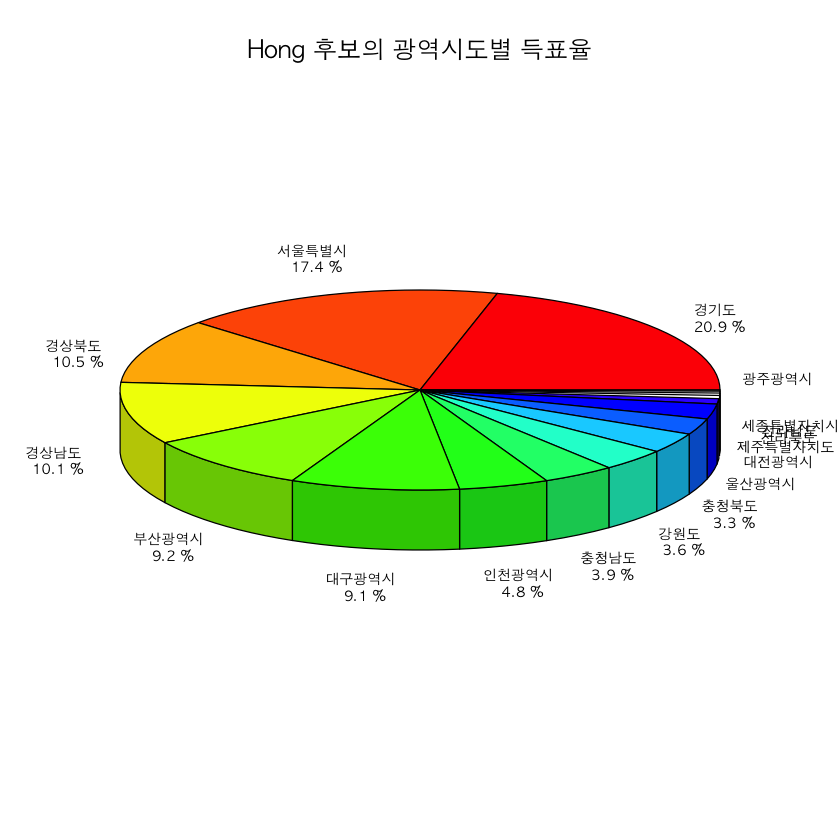

In [140]:
# hong 후보의 광역시도별 득표율 
elec_hong_sum <- aggregate(hong ~ 광역시도, election, sum)
elec_hong_sum <- orderBy(~ -hong, elec_hong_sum)
e_h_ratio <- round(elec_hong_sum$hong / sum(elec_hong_sum$hong) *100,1)
h_label <- paste(elec_hong_sum$광역시도, ifelse(e_h_ratio >= 3,
                                             paste("\n", e_h_ratio, "%"), " " ))
par(family = "AppleGothic")

pie3D(elec_hong_sum$hong,
     labels = h_label,
     main = "Hong 후보의 광역시도별 득표율",
     labelcex = 0.7
     ) 

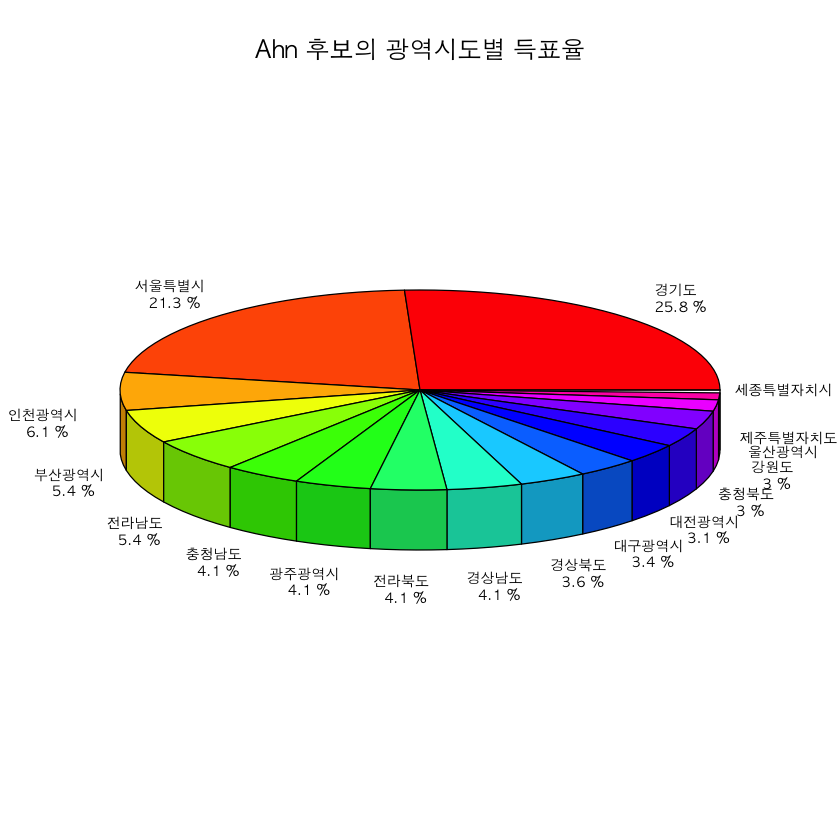

In [141]:
# ahn 후보의 광역시도별 득표율 
elec_ahn_sum <- aggregate(ahn ~ 광역시도, election, sum)
elec_ahn_sum <- orderBy(~ -ahn, elec_ahn_sum)
e_a_ratio <- round(elec_ahn_sum$ahn / sum(elec_ahn_sum$ahn) *100,1)
a_label <- paste(elec_ahn_sum$광역시도, ifelse(e_a_ratio >= 3,
                                             paste("\n", e_a_ratio, "%"), " " ))
par(family = "AppleGothic")

pie3D(elec_ahn_sum$ahn,
     labels = a_label,
     main = "Ahn 후보의 광역시도별 득표율",
     labelcex = 0.7
     ) 

In [142]:
head(election)

X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359
